## 1 读取数据预处理的文件

In [1]:
import numpy as np
import pandas as pd
from pandas import  DataFrame

import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
np.random.seed(7)

df = pd.read_csv(r"./泰迪杯数据01.csv")
df

,日期1,总有功功率（kw）,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2018/1/1 00:00:00,244033.7682,22,12,3,3,3.0,3.0
1,2018/1/1 00:15:00,232720.6402,22,12,3,3,3.0,3.0
2,2018/1/1 00:30:00,231685.6891,22,12,3,3,3.0,3.0
3,2018/1/1 00:45:00,227581.3317,22,12,3,3,3.0,3.0
4,2018/1/1 01:00:00,233482.4269,22,12,3,3,3.0,3.0
...,...,...,...,...,...,...,...,...
128631,2021/8/31 22:45:00,202409.1270,32,26,1,1,7.0,6.0
128632,2021/8/31 23:00:00,218576.4635,32,26,1,1,7.0,6.0
128633,2021/8/31 23:15:00,200112.5091,32,26,1,1,7.0,6.0
128634,2021/8/31 23:30:00,199865.5937,32,26,1,1,7.0,6.0


In [2]:
df.columns
df  = df.rename(columns={'日期1':'date'}) #将日期1改为date

## 2 查看时序

In [3]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'])
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'}) #将date变为蓝色

,date,总有功功率（kw）,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2018-01-01 00:00:00,244033.768200,22,12,3,3,3.000000,3.000000
1,2018-01-01 00:15:00,232720.640200,22,12,3,3,3.000000,3.000000
2,2018-01-01 00:30:00,231685.689100,22,12,3,3,3.000000,3.000000
3,2018-01-01 00:45:00,227581.331700,22,12,3,3,3.000000,3.000000
4,2018-01-01 01:00:00,233482.426900,22,12,3,3,3.000000,3.000000


In [4]:
df.isna().sum()

date           0
总有功功率（kw）      0
最高温度           0
最低温度           0
白天风力风向         0
夜晚风力风向         0
天气1          960
天气2          288
dtype: int64

In [5]:
df = df.fillna(method='ffill',axis=0)

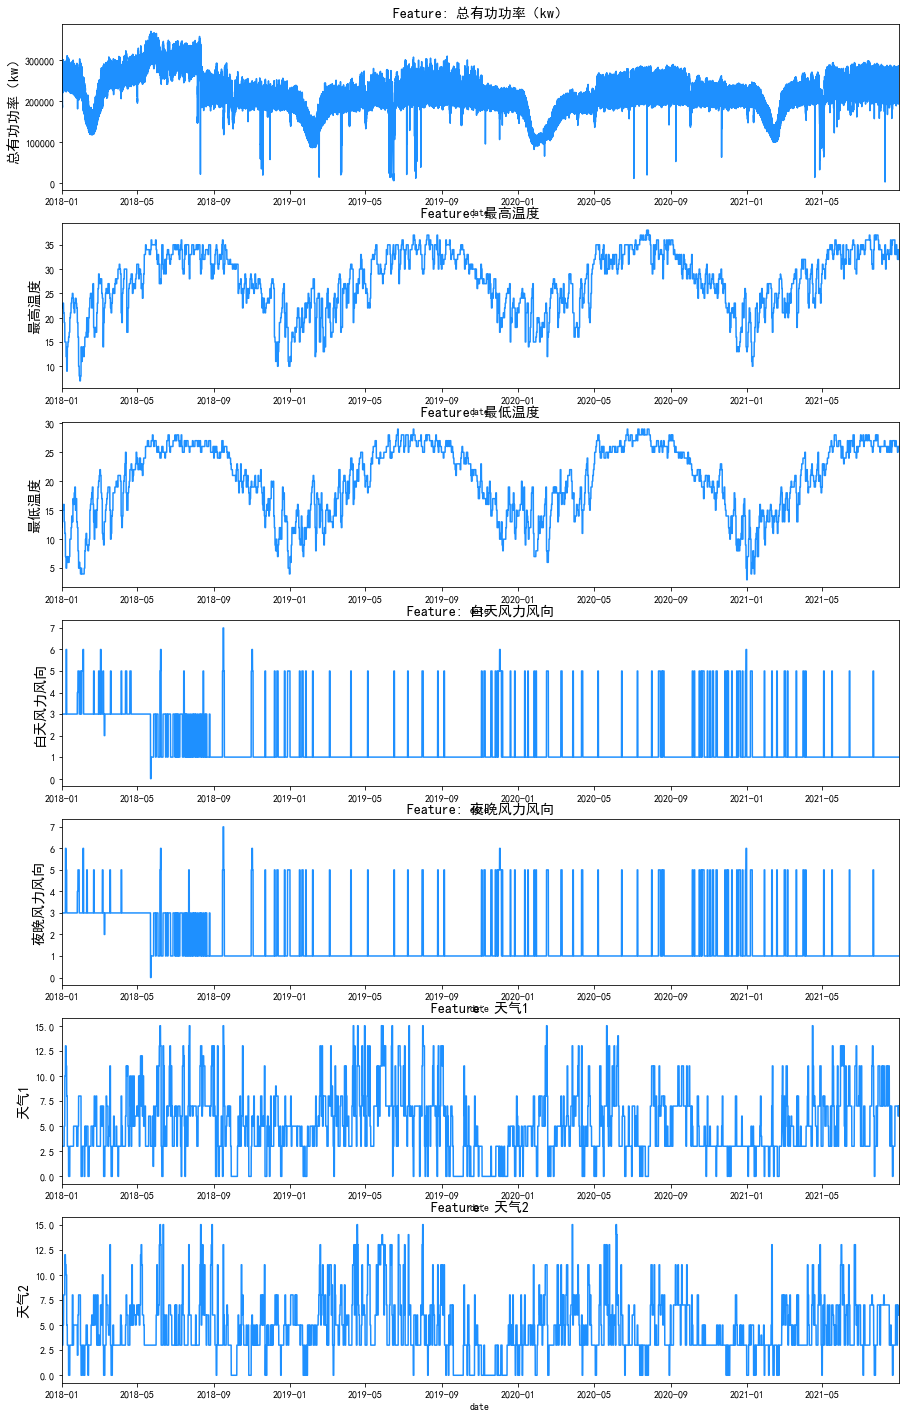

In [6]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=7, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):  #enumerate将组成一个遍历序列
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')  #lineplot方法画图
    ax[i].set_title('Feature: {}'.format(column), fontsize=14) #显示标题
    ax[i].set_ylabel(ylabel=column, fontsize=14) #显示y轴变量

    ax[i].set_xlim([date(2018, 1, 1), date(2021, 8, 31)]) #设置x轴的范围

In [7]:
# #df = df.sort_values(by='date') #以date列的数据作为升序排序

# # Check time intervals
# df['delta'] = df['date'] - df['date'].shift(1)  #shift将数据往后移动一位

# df[['date', 'delta']].head()

In [8]:
# df['delta'].sum(), df['delta'].count()

In [9]:
# df = df.drop('delta',axis=1)
# df.isna().sum()

In [10]:
#3.1绘制热力图HeatMap颜色

In [11]:
#缺失值处理（多种填充方式）


(17532.0, 18870.0)

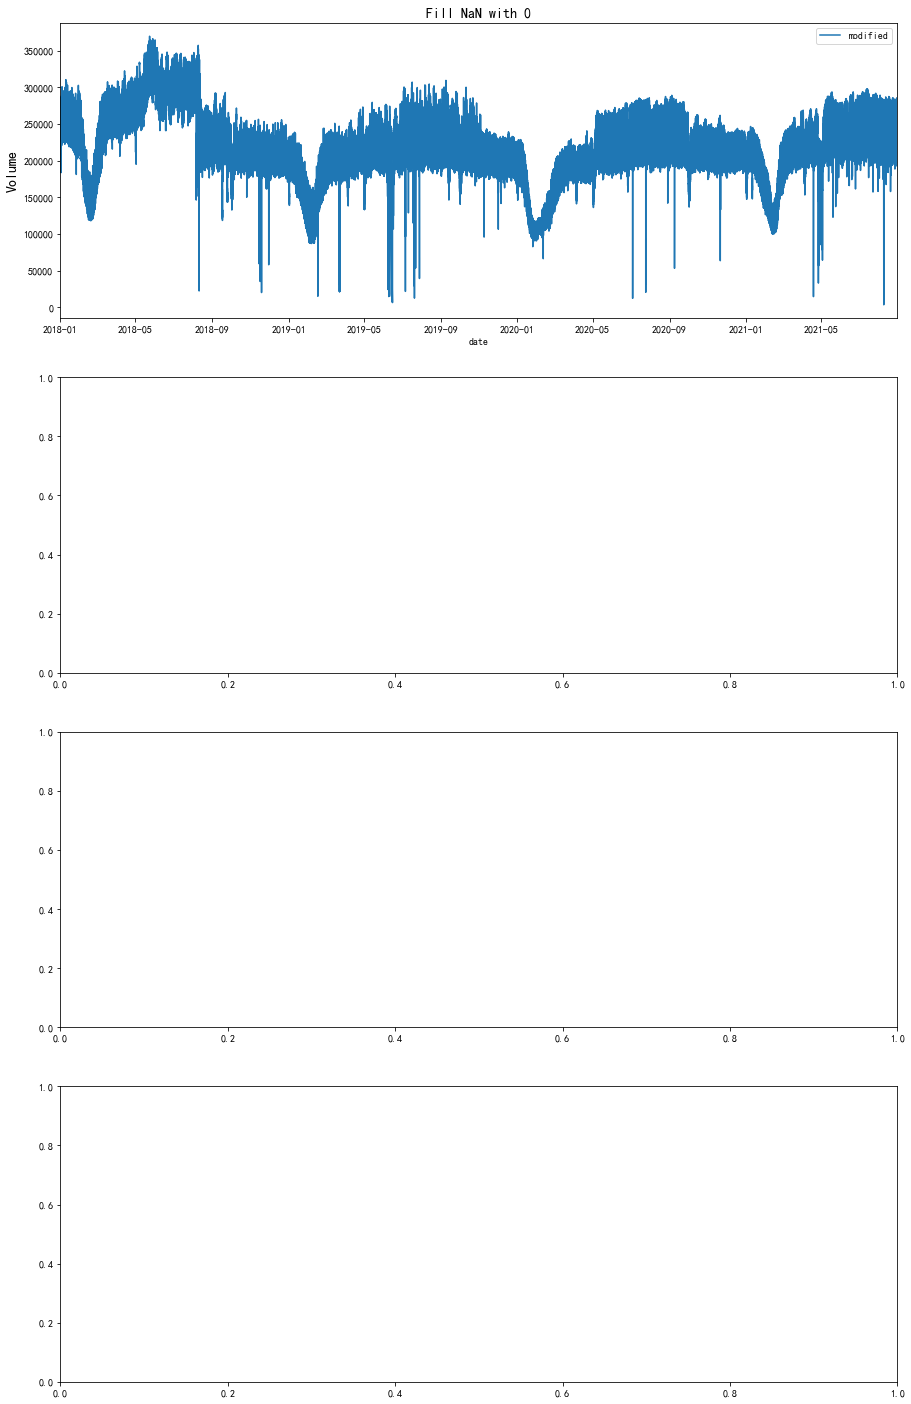

In [12]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))
sns.lineplot(x=df['date'], y=df['总有功功率（kw）'],ax=ax[0],label = 'modified')
ax[0].set_title('Fill NaN with 0', fontsize=14) #显示标题
ax[0].set_ylabel(ylabel='Volume', fontsize=14) #显示y轴变量
ax[0].set_xlim([date(2018, 1, 1), date(2021, 8, 31)]) #设置x轴的范围

In [13]:
#补缺失值
df['总有功功率（kw）'] = df['总有功功率（kw）'].interpolate()
df.index = df['date']

## 4 数据平滑与采样

In [14]:
# 行重复删除
df[df.index.duplicated()]
df.loc['2020-07-04 00:00:00']
df = df[~df.index.duplicated()]

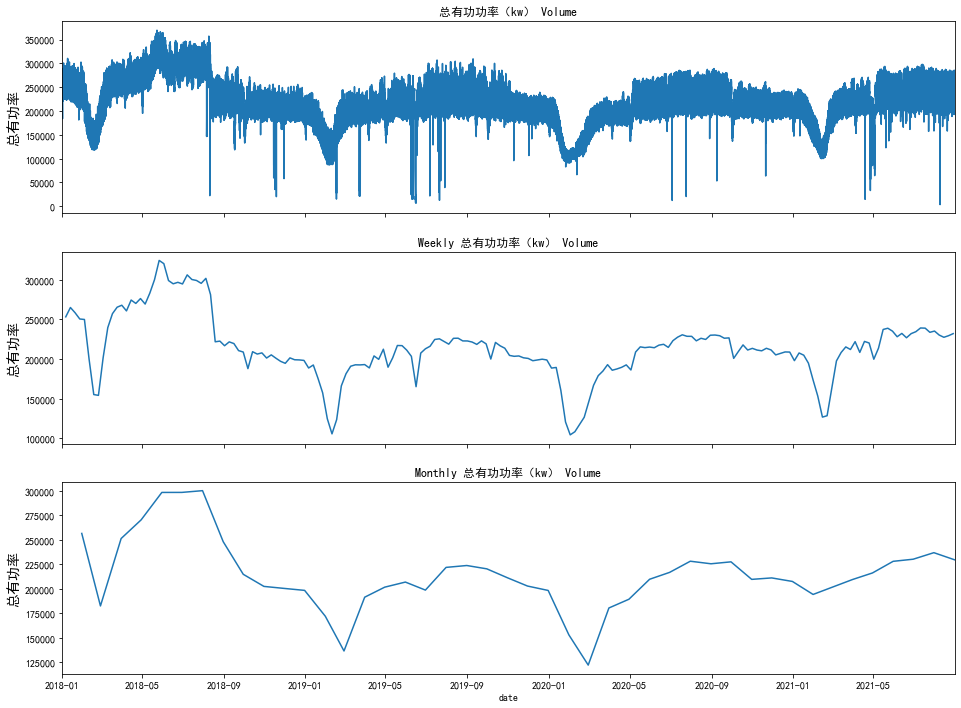

In [15]:
fig, ax = plt.subplots(nrows=3,ncols=1, sharex=True, figsize=(16,12))

sns.lineplot(x=df['date'],y=df['总有功功率（kw）'],ax=ax[0])
ax[0].set_title('总有功功率（kw） Volume')
ax[0].set_ylabel(ylabel='总有功率',fontsize=14)

ts = df['总有功功率（kw）'].resample('W',closed='left').mean()
sns.lineplot(x=df['date'],y=ts,ax=ax[1])
ax[1].set_title('Weekly 总有功功率（kw） Volume')
ax[1].set_ylabel(ylabel='总有功率',fontsize=14)

ts = df['总有功功率（kw）'].resample('M',closed='left').mean()
sns.lineplot(x=df['date'],y=ts,ax=ax[2])
ax[2].set_title('Monthly 总有功功率（kw） Volume')
ax[2].set_ylabel(ylabel='总有功率',fontsize=14)


for i in range(3):
    ax[i].set_xlim([date(2018,1,1),date(2021,8,31)])
    plt.show()

In [16]:
#正如我们所看到的，将样本减少到每周可以平滑数据，并帮助进行分析
downsample = df[['date',
                 '总有功功率（kw）', 
                ]].resample('7D', on='date').mean().reset_index(drop=True) #将数据平滑到每个星期

downsample

,总有功功率（kw）
0,254094.368485
1,264490.044881
2,257543.163442
3,249642.665462
4,246145.866215
...,...
187,230609.177496
188,226639.084830
189,230264.816100
190,232199.219353


## 5 平稳性检验

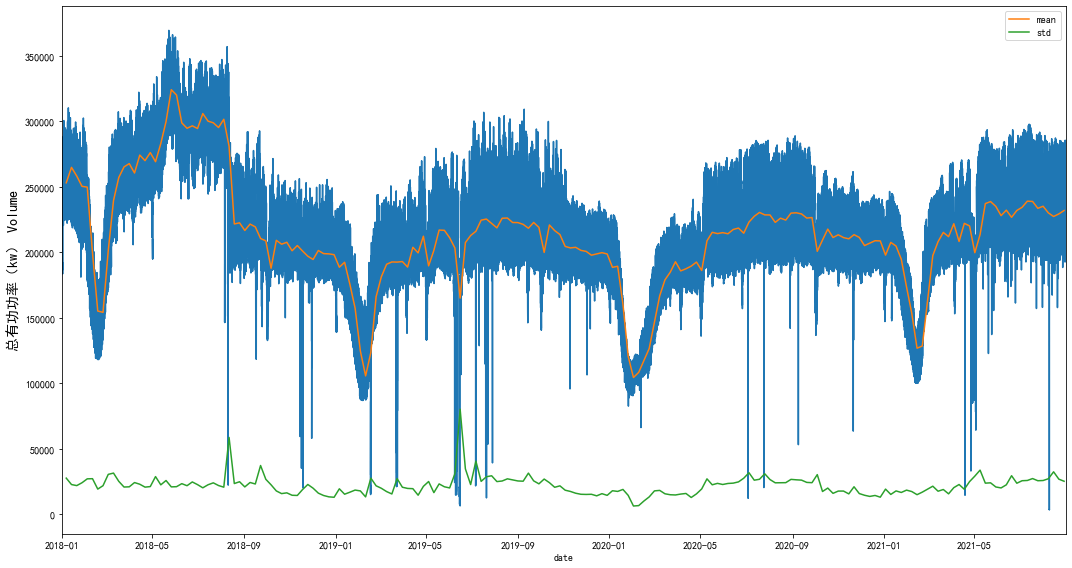

In [17]:
rolling_window = 52
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

ts = df['总有功功率（kw）'].resample('W',closed='left').mean()
ts1 = df['总有功功率（kw）'].resample('W',closed='left').std()
sns.lineplot(x=df['date'],y=df['总有功功率（kw）'],ax=ax)
sns.lineplot(x=df['date'],y=ts,ax=ax,label='mean')
sns.lineplot(x=df['date'],y=ts1,ax=ax,label='std')
ax.set_ylabel(ylabel='总有功功率（kw） Volume', fontsize=14)
ax.set_xlim([date(2018, 1, 1), date(2021, 8, 31)])
plt.tight_layout()
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['总有功功率（kw）'].values)
result
#p值小于0.05，第一个值比第五个值小，趋势平稳

(-6.674613892094356,
 4.4978988063956405e-09,
 72,
 128083,
 {'1%': -3.430401056198406,
  '5%': -2.8615625660943227,
  '10%': -2.566782011132868},
 2641933.054895261)

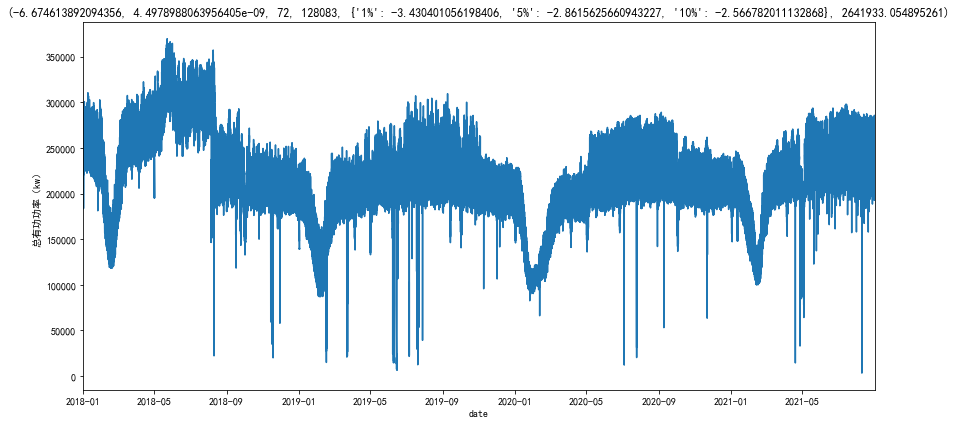

In [19]:
# Thanks to https://www.kaggle.com/iamleonie for this function!
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

def visualize_adfuller_results(series, title, ax):
    sns.lineplot(x=df['date'],y=series,ax=ax)
    ax.set_title(result)
    ax.set_ylabel(title)
    ax.set_xlim([date(2018, 1, 1), date(2021, 8, 31)])

visualize_adfuller_results(df['总有功功率（kw）'].values, '总有功功率（kw）',ax=ax)
# visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1, 0])
# visualize_adfuller_results(df['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
# visualize_adfuller_results(df['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
# visualize_adfuller_results(df['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

# f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

## 白噪声检验

In [20]:
from statsmodels.stats.diagnostic import accorr_ljungbox
#返回统计量与p值
print('差分序列的白噪声检验结果为:',accorr_ljungbox(df['date'],lags=1,return_df=True))

ImportError: cannot import name 'accorr_ljungbox' from 'statsmodels.stats.diagnostic' (c:\users\king\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\diagnostic.py)

In [ ]:
#如果不是静态的，我们想使用一个模型，则数据必须转换。将数据转换为平稳序列的两种最常见的方法是：#
#变换：例如对数或平方根，以稳定非恒定方差
#差分：从以前的值中减去当前值

## 6 数据转换

## 对数

<AxesSubplot:xlabel='总有功功率（kw）_log', ylabel='Density'>

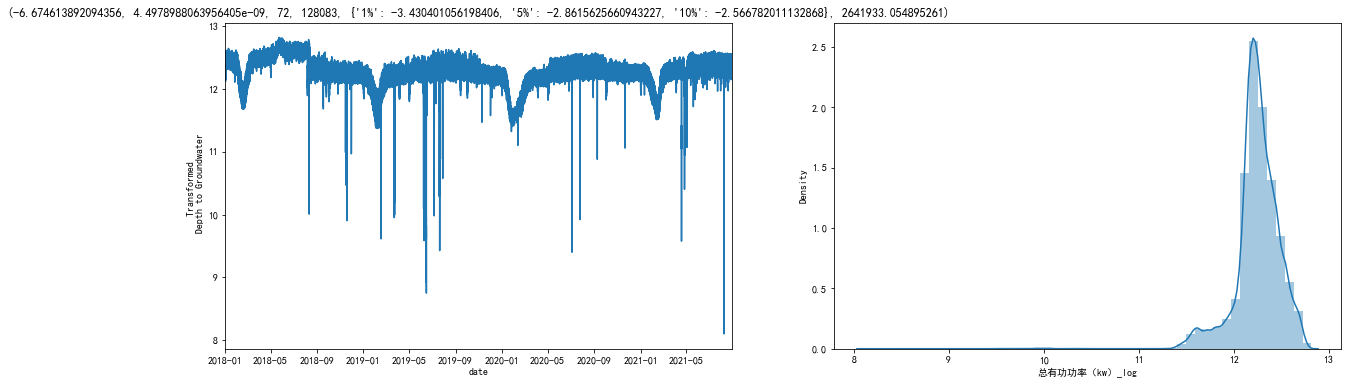

In [21]:
#以e为底的对数
df['总有功功率（kw）_log'] = np.log(df['总有功功率（kw）'])

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['总有功功率（kw）_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(df['总有功功率（kw）_log'], ax=ax[1]) #直方图和核密度图的结合，查看单个连续型变量的分布

## 一阶差分

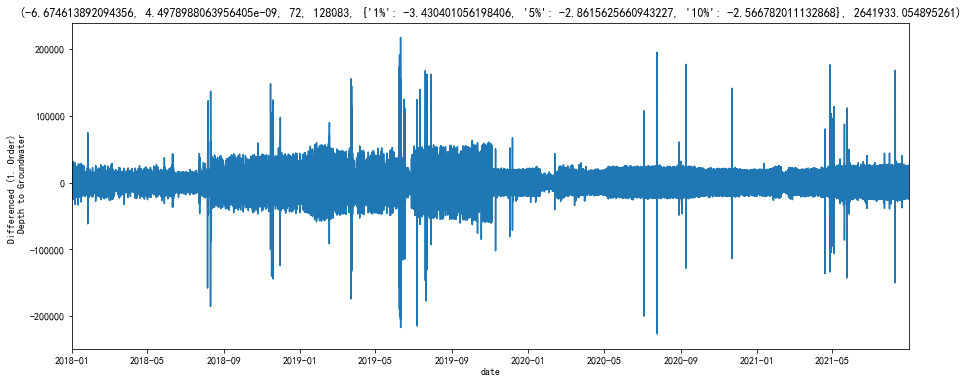

In [22]:
# 一阶差分
ts_diff = np.diff(df['总有功功率（kw）'])  #获取前一个与后一个数的差值
df['总有功功率（kw）_diff_1'] = np.append([0], ts_diff)  #将ts_diff(差值)放进总功率

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['总有功功率（kw）_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

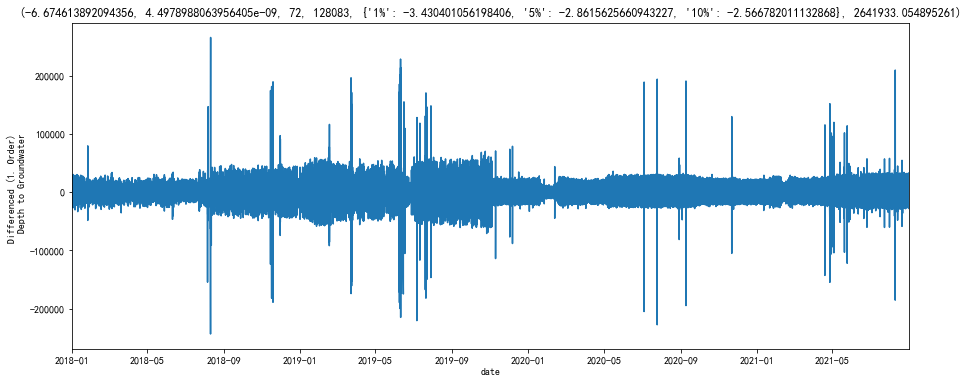

In [23]:
# 二阶差分
# ts_diff = np.diff(df['总有功功率（kw）'],periods=2)  #获取前一个与后一个数的差值
df['总有功功率（kw）_diff_2'] = df['总有功功率（kw）'].diff(periods=2)  #将ts_diff(差值)放进总功率

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['总有功功率（kw）_diff_2'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

## 异常值处理

In [24]:
from scipy.stats import kstest
#正态检测
u = df['总有功功率（kw）'].mean()
# 计算标准差
std = df['总有功功率（kw）'].std()
# 计算P值
res=kstest(df['总有功功率（kw）'].astype(float),  'norm', (u, std))[1]
print(res)
# 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从。
if res<=0.05:
    print('该列数据服从正态分布------------')
    print('均值为：%.3f，标准差为：%.3f' % (u, std))
    print('------------------------------')
else:
    print("错误")

#KS检验3σ异常点检测
sum =[]
# 计算均值
u = df['总有功功率（kw）'].mean()
# 计算标准差
std = df['总有功功率（kw）'].std()
# 定义3σ法则识别异常值
# 识别异常值
error = df['总有功功率（kw）'][np.abs(df['总有功功率（kw）'] - u) > 3 * std]
df.loc[error.index,'总有功功率（kw）'] = np.nan
# 剔除异常值，保留正常的数据
data_c = df['总有功功率（kw）'][np.abs(df['总有功功率（kw）'] - u) <= 3 * std]
# 输出异常数据
sum.append(error)
# print(error)

0.0
该列数据服从正态分布------------
均值为：213680.590，标准差为：45331.198
------------------------------


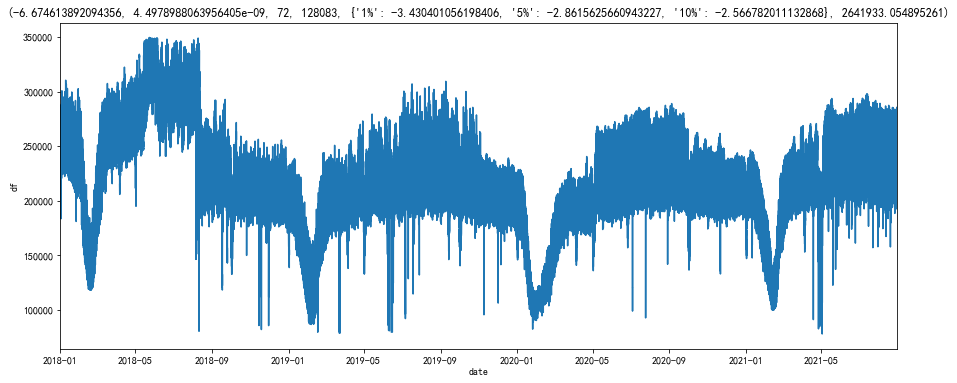

In [25]:
df = df.fillna(method='ffill',axis=0)  #异常处理

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['总有功功率（kw）'],'df' , ax=ax)

In [26]:
from scipy.stats import kstest
#正态检测
u = df['总有功功率（kw）_diff_1'].mean()
# 计算标准差
std = df['总有功功率（kw）_diff_1'].std()
# 计算P值
res=kstest(df['总有功功率（kw）_diff_1'].astype(float),  'norm', (u, std))[1]
print(res)
# 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从。
if res<=0.05:
    print('该列数据服从正态分布------------')
    print('均值为：%.3f，标准差为：%.3f' % (u, std))
    print('------------------------------')
else:
    print("错误")

#KS检验3σ异常点检测
sum =[]
# 计算均值
u = df['总有功功率（kw）_diff_1'].mean()
# 计算标准差
std = df['总有功功率（kw）_diff_1'].std()
# 定义3σ法则识别异常值
# 识别异常值
error = df['总有功功率（kw）_diff_1'][np.abs(df['总有功功率（kw）_diff_1'] - u) > 3 * std]
df.loc[error.index,'总有功功率（kw）_diff_1'] = np.nan
# 剔除异常值，保留正常的数据
data_c = df['总有功功率（kw）_diff_1'][np.abs(df['总有功功率（kw）_diff_1'] - u) <= 3 * std]
sum.append(error)
# 输出异常数据
# print(error)

0.0
该列数据服从正态分布------------
均值为：-0.355，标准差为：12871.263
------------------------------


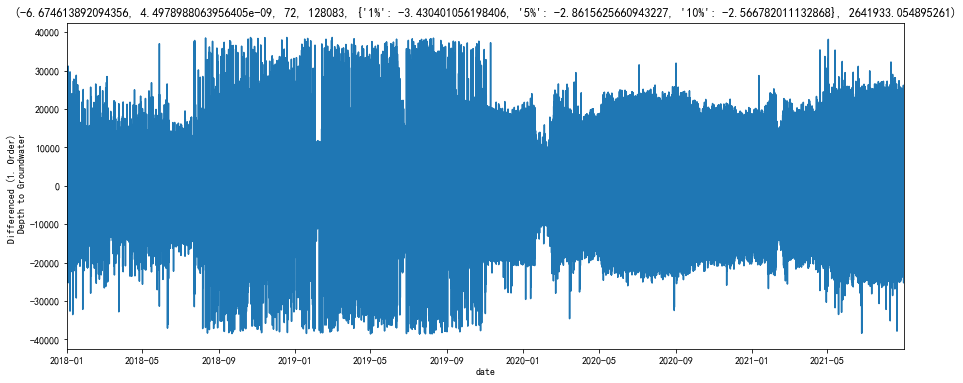

In [27]:
df = df.fillna(method='ffill',axis=0)  #异常处理

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['总有功功率（kw）_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax=ax)

In [28]:
df['总有功功率（kw）'] = df['总有功功率（kw）'].astype(float)
df['最高温度'] = df['最高温度'].astype(float)
df['最低温度'] = df['最低温度'].astype(float)
df['白天风力风向'] = df['白天风力风向'].astype(float)
df['夜晚风力风向'] = df['夜晚风力风向'].astype(float)
df['天气1'] = df['天气1'].astype(float)
df['天气2'] = df['天气2'].astype(float)
df['总有功功率（kw）_diff_1'] = df['总有功功率（kw）_diff_1'].astype(float)
#df['总有功功率（kw）_log'] = df['总有功功率（kw）_log'].astype(float)

## 7 特征工程

## 7.1 时序提取

In [29]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df

,date,总有功功率（kw）,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2,总有功功率（kw）_log,总有功功率（kw）_diff_1,总有功功率（kw）_diff_2,year,month,day
date,,,,,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,244033.7682,22.0,12.0,3.0,3.0,3.0,3.0,12.405062,0.0000,NaN,2018,1,1
2018-01-01 00:15:00,2018-01-01 00:15:00,232720.6402,22.0,12.0,3.0,3.0,3.0,3.0,12.357594,-11313.1280,NaN,2018,1,1
2018-01-01 00:30:00,2018-01-01 00:30:00,231685.6891,22.0,12.0,3.0,3.0,3.0,3.0,12.353137,-1034.9511,-12348.0791,2018,1,1
2018-01-01 00:45:00,2018-01-01 00:45:00,227581.3317,22.0,12.0,3.0,3.0,3.0,3.0,12.335263,-4104.3574,-5139.3085,2018,1,1
2018-01-01 01:00:00,2018-01-01 01:00:00,233482.4269,22.0,12.0,3.0,3.0,3.0,3.0,12.360862,5901.0952,1796.7378,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31 22:45:00,2021-08-31 22:45:00,202409.1270,32.0,26.0,1.0,1.0,7.0,6.0,12.218046,-711.5531,-2747.5163,2021,8,31
2021-08-31 23:00:00,2021-08-31 23:00:00,218576.4635,32.0,26.0,1.0,1.0,7.0,6.0,12.294891,16167.3365,15455.7834,2021,8,31
2021-08-31 23:15:00,2021-08-31 23:15:00,200112.5091,32.0,26.0,1.0,1.0,7.0,6.0,12.206635,-18463.9544,-2296.6179,2021,8,31


## 7.2 编码循环特征

(17532.0, 18870.0)

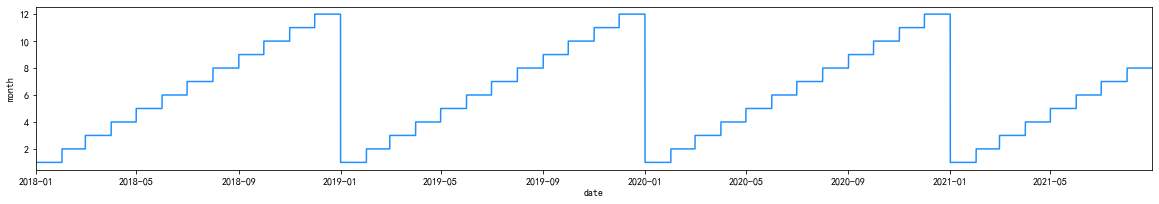

In [30]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')  #这一年的月份数据
ax.set_xlim([date(2018, 1, 1), date(2021, 8, 31)])

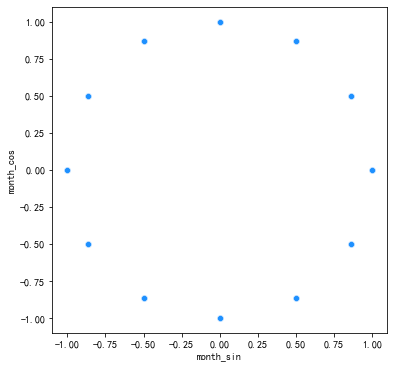

In [31]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

## 7.3 时间序列分解

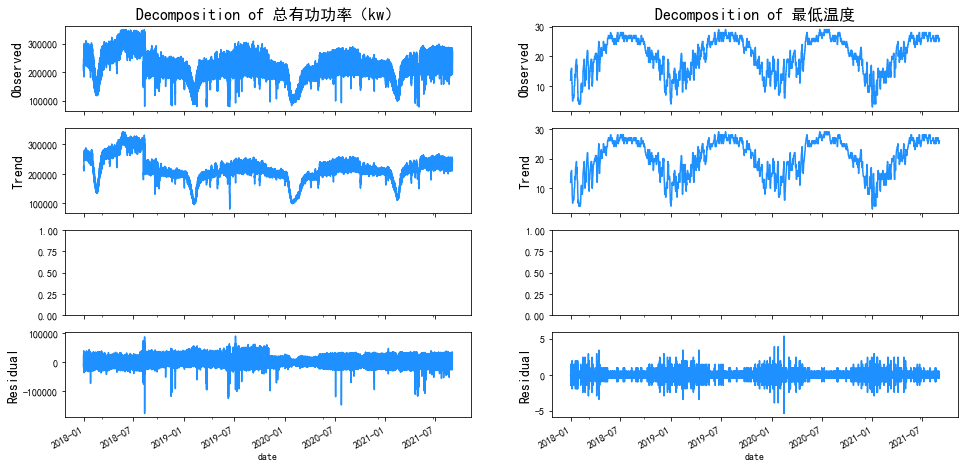

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    '总有功功率（kw）']

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend=0)  #使用滑动平均的方法进行时间序列分解
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['总有功功率（kw）', '最低温度']):

    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend=0)

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')  #趋势非线性线
    ax[1,i].set_ylabel('Trend', fontsize=14)

    #res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')  #季节周期
    #ax[2,i].set_ylabel('Seasonal', fontsize=14)

    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')  #残差网络分析
    ax[3,i].set_ylabel('Residual', fontsize=14)



plt.show()

## 7.4 滞后特征

In [33]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)  #将数据移动后赋值
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

## 7.6 探索性数据分析

In [34]:
# f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
# f.suptitle('Seasonal Components of Features', fontsize=16)

# for i, column in enumerate(core_columns):  #输出该函数的季节周期
#     sns.lineplot(x=df['date'], y=df[column + '_seasonal'], color='dodgerblue', label='P')
#     ax.set_ylabel(ylabel=column, fontsize=14)
#     ax.set_xlim([date(2018, 1, 1), date(2021, 8, 31)])

## 7.7 相关性分析

Text(0.5, 1.0, 'Correlation Matrix of Lagged Features')

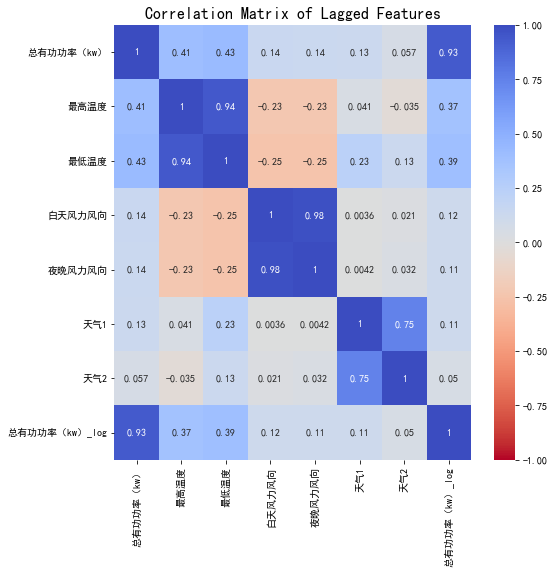

In [35]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

shifted_cols = df.columns[:9]
corrmat = df[shifted_cols].corr()  #输出函数的相关性

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')  #画出相关性的热力图
ax.set_title('Correlation Matrix of Lagged Features', fontsize=16)

## 7.8 自相关分析

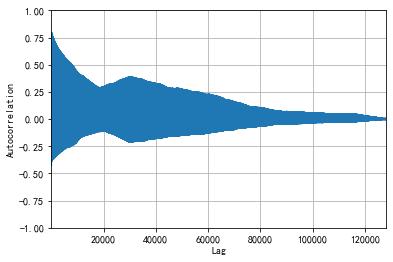

In [36]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['总有功功率（kw）_diff_1'])  #自相关图
plt.show()

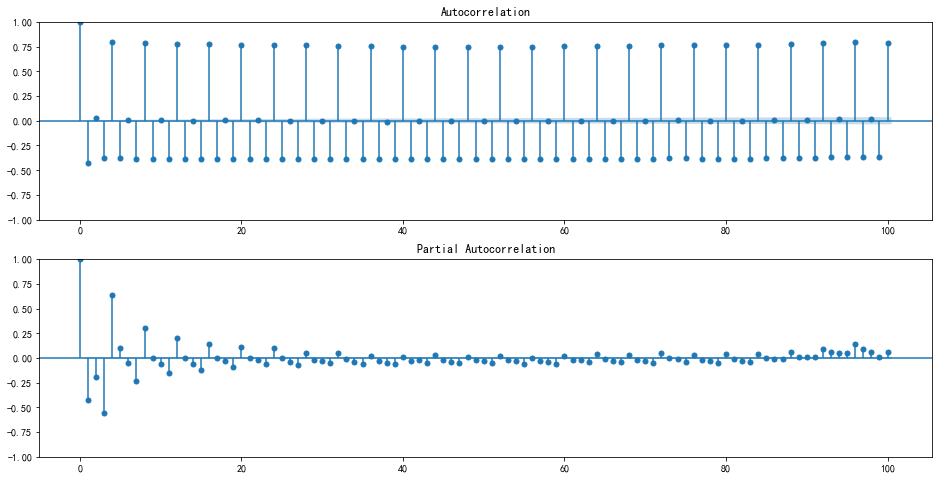

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['总有功功率（kw）_diff_1'], lags=100, ax=ax[0])  #自相关图
plot_pacf(df['总有功功率（kw）_diff_1'], lags=100, ax=ax[1])  #偏自相关图

plt.show()

## 8建模

## 8.1 时序中交叉验证

- 由于存在时间先后的问题，对于存在时间特性的分类或者回归问题不能简单的使用StratifiekdKFold或者KFold进行交叉验证，更不能shuffle，会带来一定的时序特征交叉的问题，比如用未来的数据来预测过去的数据，这样的交叉验证结果在业务上意义不大，在比赛中也很容易造成过拟合的问题。简单总结一下时间序列的交叉验证方法：

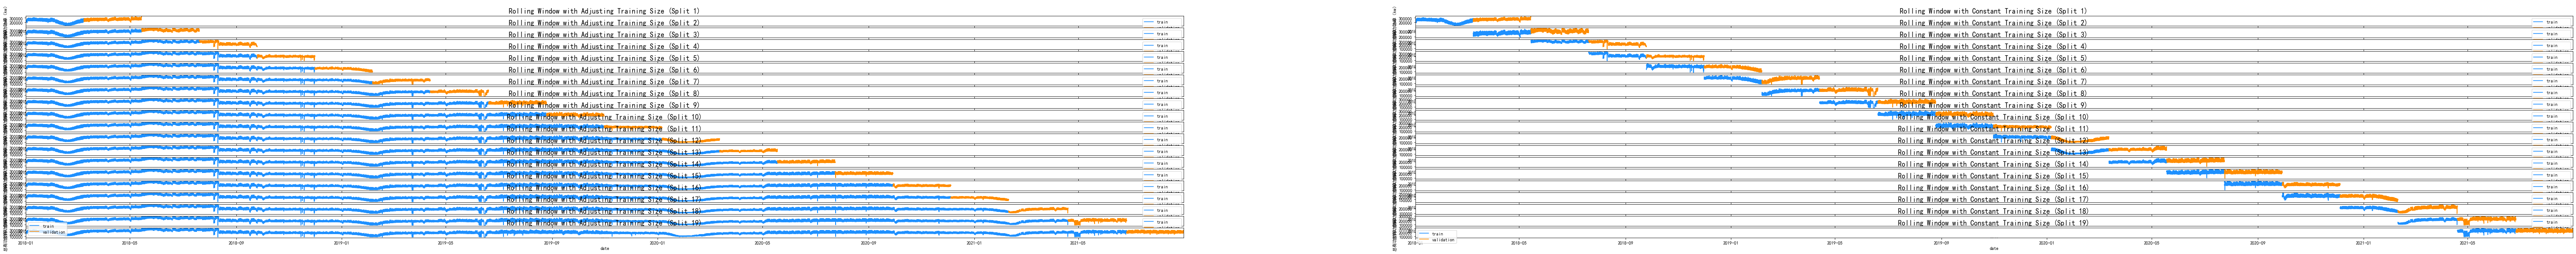

In [38]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 19  #训练量为3

X = df['date']
y = df['总有功功率（kw）']

folds = TimeSeriesSplit(n_splits=N_SPLITS)
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(101, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):  #获取训练数据和测试数据
    X_train, X_valid = X[train_index], X[valid_index]  #获取x的训练，测试数据
    y_train, y_valid = y[train_index], y[valid_index]  #获取y的训练，测试数据

    sns.lineplot(  #输出训练数据
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):  #输出测试数据
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):  #x轴的范围
    ax[i, 0].set_xlim([date(2018, 1, 1), date(2021, 8, 31)])
    ax[i, 1].set_xlim([date(2018, 1, 1), date(2021, 8, 31)])

plt.tight_layout()
plt.show()

## 8.2 单变量时间序列模型

In [39]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size
df = df.fillna(0)
univariate_df = df[['date', '总有功功率（kw）']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

102524 25632


In [40]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)  
TimeSeriesSplit(n_splits=3)
for train, test in tscv.split(y):
     print("%s %s" % (train, test))

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


## 8.2.1ARIMA

In [120]:
from datetime import datetime   #数据索引改为时间
import statsmodels.api as sm     #acf,pacf图
from statsmodels.tsa.stattools import adfuller  #adf检验
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

KeyboardInterrupt: 

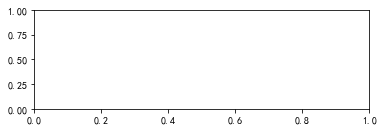

In [307]:
df_diff = list(np.diff(df['总有功功率（kw）']))
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
def draw_acf_pacf(ts,lags):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts,ax=ax1,lags=lags)  #lags 表示滞后的阶数，值为30，显示30阶的图像
    ax2 = f.add_subplot(212)
    plot_pacf(ts,ax=ax2,lags=lags)  
    plt.subplots_adjust(hspace=0.5)
    plt.show()
draw_acf_pacf(df_diff,50)

In [ ]:
warnings.filterwarnings("ignore")
# ##2参数调优：BIC
pmax=int(len(df_diff)/10) #一般阶数不超过length/10
qmax=int(len(df_diff)/10) #一般阶数不超过length/10
bic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(df['总有功功率（kw）'],order=(p,1,q)).fit().bic)
            #print("times", "p", p, "q", q)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix=pd.DataFrame(bic_matrix)
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(bic_matrix,
               mask=bic_matrix.isnull(),
               ax=ax,
               annot=True,
               fmt='.2f')
ax.set_title('Bic')
bic_matrix.stack()
p,q=bic_matrix.stack().idxmin() #最小值的索引
print('用BIC方法得到最优的p值是%d,q值是%d'%(p,q))

In [ ]:
train = df['总有功功率（kw）'][:int(0.8*len(df))]
test = df['总有功功率（kw）'][int(0.8*len(df)):]
model = ARIMA(df['总有功功率（kw）'].astype(float), (6,1,0)).fit()
model.summary2()   #生成一份模型报告

# LSTM
## LSTM十天预测

In [130]:
test_size = 960  #预测测试值范围
train_size = 93440 #预测训练值范围
df = df.fillna(0)
univariate_df = df[['date', '总有功功率（kw）']][:94400].copy()
univariate_df.columns = ['ds', 'y']

# #添加预测区间10天
# import datetime
# indexs = pd.date_range(start='2021-09-01 00:00:00',end='2021-09-10 23:45:00',freq='15T')
# indexs = DataFrame(indexs,columns=['ds'])
# univariate_df = DataFrame(univariate_df) 
# univariate_df = pd.concat((univariate_df,indexs),axis=0,join='outer')
# univariate_df.index = univariate_df['ds']


# LSTM对输入数据的大小敏感，需要对输入数据做标准化处理
# 使用MinMaxScaler将数据映射到0-1区间
from sklearn.preprocessing import MinMaxScaler
data = univariate_df.filter(['y'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)


scaled_data[-10:]

array([[-0.48415155],
       [-0.48340588],
       [-0.43833355],
       [-0.50539745],
       [-0.50965986],
       [-0.51662321],
       [-0.46136816],
       [-0.52413913],
       [-0.52954567],
       [-0.53070154]])

In [131]:
scaled_data.shape

(94400, 1)

In [132]:
def check(du):
    #正态检测
    u = du.mean()
    # 计算标准差
    std = du.std()
    # 计算P值
    res=kstest(du.astype(float),  'norm', (u, std))[1]
    print(res)
    # 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从。
    if res<=0.05:
        print('该列数据服从正态分布------------')
        print('均值为：%.3f，标准差为：%.3f' % (u, std))
        print('------------------------------')
    else:
        print("错误")

def sta(sta_du):
    stas = []
    u = sta_du.mean()
    std = sta_du.std()
    for i in sta_du:
        stas.append((i-u)/(std*std))
    return stas

In [133]:
# du_day_max = df['最高温度'].resample('D').mean()
# du_day_min = df['最低温度'].resample('D').mean()
du_day_max = df['最高温度'][:94400]
du_day_min = df['最低温度'][:94400]

#温度标准化
from scipy.stats import kstest
check(du_day_max)
check(du_day_min)
du_day_max = sta(du_day_max)
du_day_min = sta(du_day_min)

0.0
该列数据服从正态分布------------
均值为：27.517，标准差为：6.430
------------------------------
0.0
该列数据服从正态分布------------
均值为：20.380，标准差为：6.170
------------------------------


<AxesSubplot:ylabel='Density'>

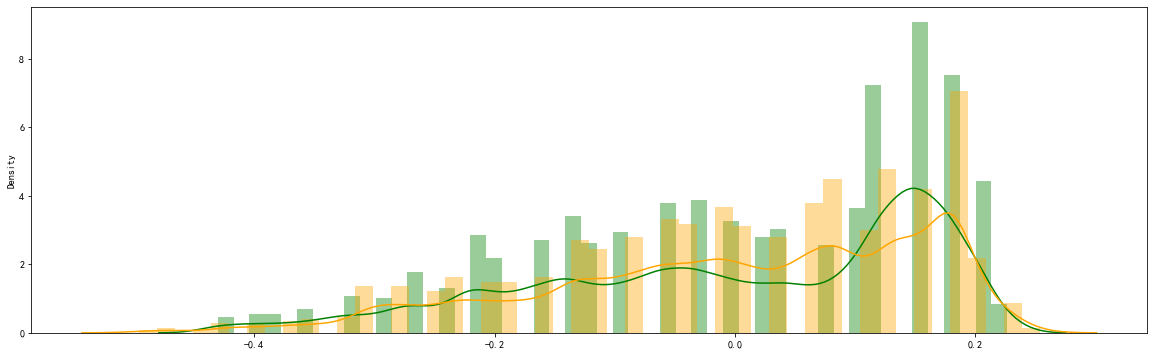

In [134]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
sns.distplot(du_day_min, ax=ax,color='green',label='du_day_max') #直方图和核密度图的结合，查看单个连续型变量的分布
sns.distplot(du_day_max, ax=ax, color='orange',label='du_day_min') #直方图和核密度图的结合，查看单个连续型变量的分布

In [135]:
# day_index = pd.date_range(start='2018-01-01',end='2021-08-31',freq='D')
# du_day_max = pd.DataFrame(du_day_max,columns=['max'])
# du_day_min = pd.DataFrame(du_day_min,columns=['min'])
# day_index = pd.DataFrame(day_index,columns=['date'])
# du_day_max = pd.concat((du_day_max,day_index),axis=1)
# du_day_min = pd.concat((du_day_min,day_index),axis=1)
# du_day_max.index = du_day_max['date']
# du_day_min.index = du_day_min['date']
du_day_max = list(map(list, zip(du_day_max)))
du_day_min = list(map(list, zip(du_day_min)))

In [136]:
train.shape

(93344, 1)

In [137]:
look_back = 96 # 96
# 将数据分为训练集、测试集
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]#, scaled_data[-960:,:]

# 生成t-x数据
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# 设置随机种子，保证复现

np.random.seed(7)


x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)
# x_predict, y_predict = create_dataset(predict, look_back)

# 添加特征列
x_train = np.append(x_train,du_day_max[0:train_size-look_back*2],axis=1)
x_train = np.append(x_train,du_day_min[0:train_size-look_back*2],axis=1)
x_test = np.append(x_test,du_day_max[train_size:],axis=1)
x_test = np.append(x_test,du_day_min[train_size:],axis=1)


# LSTM网络的输入为【批次大小(行数)，时间步长，特征数量(列数)】
# 将数据转换为符合输入的格式
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
# x_predict = np.reshape(x_predict, (x_predict.shape[0], 1, x_predict.shape[1]))

print(len(x_train), len(x_test))

93248 960


In [138]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 创建LSTM模型，拟合数据
model = Sequential()

# 添加128个LSTM神经元的隐层网络
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]))) #return_sequences=True
#model.add(LSTM(64, return_sequences=False))
model.add(Dense(30))
#model.add(Dense(1))

# 损失函数与adam优化器
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练数据10期, batch_size:一次训练抓取的样本数量
model.fit(x_train, y_train, batch_size=16, epochs=10 )  #validation_data=(x_test, y_test)

model.summary()

Epoch 1/10
5828/5828 [==============================] - 9s 1ms/step - loss: 0.0014
Epoch 2/10
5828/5828 [==============================] - 8s 1ms/step - loss: 7.8039e-04
Epoch 3/10
5828/5828 [==============================] - 8s 1ms/step - loss: 7.5108e-04
Epoch 4/10
5828/5828 [==============================] - 8s 1ms/step - loss: 7.2361e-04
Epoch 5/10
5828/5828 [==============================] - 8s 1ms/step - loss: 7.0061e-04
Epoch 6/10
5828/5828 [==============================] - 9s 2ms/step - loss: 6.9384e-04
Epoch 7/10
5828/5828 [==============================] - 8s 1ms/step - loss: 6.9254e-04
Epoch 8/10
5828/5828 [==============================] - 8s 1ms/step - loss: 6.9557e-04
Epoch 9/10
5828/5828 [==============================] - 8s 1ms/step - loss: 6.7275e-04
Epoch 10/10
5828/5828 [==============================] - 8s 1ms/step - loss: 6.7162e-04
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape    

In [139]:
# for i in range(test_predict[0,:].size):
#     sums = test_predict[i,:].mean()
#     test_predict[i,0] = sums

In [140]:
# 预测
#train_predict = model.predict(x_train)
test_predict = model.predict(x_test) # 3个月的数据
# predict = model.predict(x_predict) # 3个月的数据

# 前面把数据缩放到0-1范围。
# 现在跟实际值做比较，将预测值反标准化，从0-1范围转换为原数据范围
#train_predict = scaler.inverse_transform(train_predict)
#y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# predict = scaler.inverse_transform(predict)
# y_predict = scaler.inverse_transform([y_predict])

# 评估RMSE误差
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,1]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,1])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))
from sklearn.metrics import r2_score
print('R2-score:',r2_score(y_test[0], test_predict[:,1]))
#print('R2-score:',r2_score(y_test[0][:-96*10], test_predict[:-96*10,0]))

RMSE: 4519.405274940311
R2-score: 0.9703343666479972


In [146]:
tests = pd.DataFrame(test_predict[:,0])

In [147]:
tests.to_csv("数据预测1.csv",index=False,encoding='utf_8_sig')

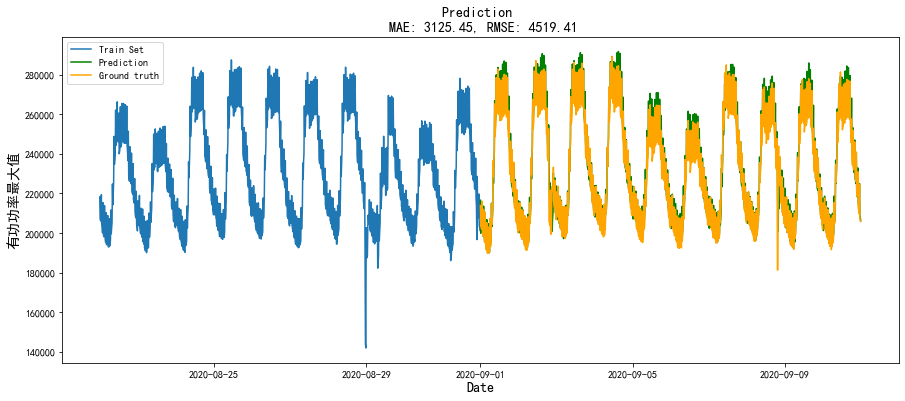

In [141]:
# 准备画图 - 训练数据
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_predict[:,0].size)['ds']

# 准备画图 - 测试数据
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks[-10*96:], y=y_train[-10*96:], ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='有功功率最大值', fontsize=14)
plt.show()

<AxesSubplot:xlabel='ds'>

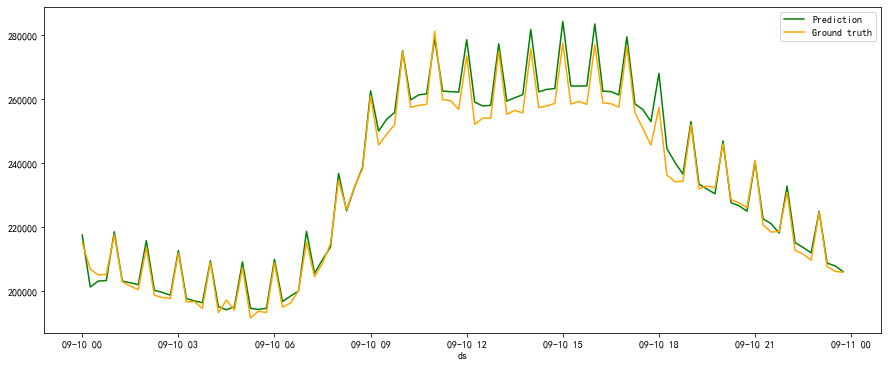

In [142]:
# 准备画图 - 测试数据
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_test_ticks[-96*1:], y=test_predict[:,0][-96*1:], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks[-96*1:], y=y_test[0][-96*1:], ax=ax, color='orange', label='Ground truth') #navajowhite

## LSTM三十天预测

In [179]:
df_day = df['总有功功率（kw）'][:102176].resample('1H').sum()
df_day = pd.DataFrame(df_day)
day_index = pd.date_range(start='2018-01-01 00:00:00',end='2020-12-01 05:00:00',freq='1H')
day_index = pd.DataFrame(day_index,columns=['date_day'])
day_index.index = day_index['date_day']
df_day = pd.concat((df_day,day_index),axis=1)

- 异常值处理

In [180]:
# from scipy.stats import kstest
# #正态检测
# u = df_day['总有功功率（kw）'].mean()
# # 计算标准差
# std = df_day['总有功功率（kw）'].std()
# # 计算P值
# res=kstest(df_day['总有功功率（kw）'].astype(float),  'norm', (u, std))[1]
# print(res)
# # 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从。
# if res<=0.05:
#     print('该列数据服从正态分布------------')
#     print('均值为：%.3f，标准差为：%.3f' % (u, std))
#     print('------------------------------')
# else:
#     print("错误")

# #KS检验3σ异常点检测
# sum =[]
# # 计算均值
# u = df_day['总有功功率（kw）'].mean()
# # 计算标准差
# std = df_day['总有功功率（kw）'].std()
# # 定义3σ法则识别异常值
# # 识别异常值
# error = df_day['总有功功率（kw）'][np.abs(df_day['总有功功率（kw）'] - u) > 3 * std]
# df_day.loc[error.index,'总有功功率（kw）'] = np.nan
# # 剔除异常值，保留正常的数据
# data_c = df_day['总有功功率（kw）'][np.abs(df_day['总有功功率（kw）'] - u) <= 3 * std]
# # 输出异常数据
# sum.append(error)
# print(error)
# df_day = df_day.fillna(method='ffill',axis=0)  #异常处理

# f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
# visualize_adfuller_results(df_day['总有功功率（kw）'],'df' , ax=ax)
# # sns.lineplot(y=df_day['总有功功率（kw）'],x=df_day['date_day'][''],ax=ax)

In [204]:
test_size =  91*24 #预测测试值范围
train_size = len(df_day) - test_size  #预测训练值范围

df_day = df_day.fillna(0)
univariate_df = df_day.copy()
univariate_df.columns = ['y', 'ds']


# LSTM对输入数据的大小敏感，需要对输入数据做标准化处理
# 使用MinMaxScaler将数据映射到0-1区间
from sklearn.preprocessing import MinMaxScaler
data = univariate_df.filter(['y'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)
scaled_data[-10:]

array([[-0.42057224],
       [-0.42820364],
       [-0.43820538],
       [-0.45068891],
       [-0.454186  ],
       [-0.45861479],
       [-0.46502179],
       [-0.47250521],
       [-0.48164341],
       [-0.86307241]])

In [205]:
def check(du):
    #正态检测
    u = du.mean()
    # 计算标准差
    std = du.std()
    # 计算P值
    res=kstest(du.astype(float),  'norm', (u, std))[1]
    print(res)
    # 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从。
    if res<=0.05:
        print('该列数据服从正态分布------------')
        print('均值为：%.3f，标准差为：%.3f' % (u, std))
        print('------------------------------')
    else:
        print("错误")

def sta(sta_du):
    stas = []
    u = sta_du.mean()
    std = sta_du.std()
    for i in sta_du:
        stas.append((i-u)/(std*std))
    return stas

In [206]:
du_day_max = df['最高温度'][:102176].resample('1H').mean()
du_day_min = df['最低温度'][:102176].resample('1H').mean()
du_day_max = du_day_max.fillna(method='ffill',axis=0)  #异常处理
du_day_min = du_day_min.fillna(method='ffill',axis=0)  #异常处理

#温度标准化
from scipy.stats import kstest
check(du_day_max)
check(du_day_min)
du_day_max = sta(du_day_max)
du_day_min = sta(du_day_min)

2.6985696121809646e-204
该列数据服从正态分布------------
均值为：27.557，标准差为：6.225
------------------------------
0.0
该列数据服从正态分布------------
均值为：20.412，标准差为：5.985
------------------------------


<AxesSubplot:ylabel='Density'>

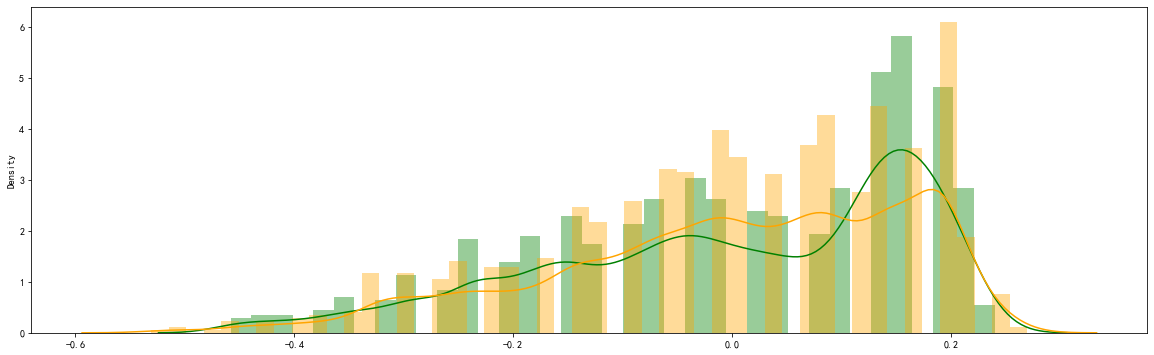

In [207]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
sns.distplot(du_day_min, ax=ax,color='green',label='du_day_max') #直方图和核密度图的结合，查看单个连续型变量的分布
sns.distplot(du_day_max, ax=ax, color='orange',label='du_day_min') #直方图和核密度图的结合，查看单个连续型变量的分布

In [208]:
# day_index = pd.date_range(start='2018-01-01',end='2021-08-31',freq='D')
# du_day_max = pd.DataFrame(du_day_max,columns=['max'])
# du_day_min = pd.DataFrame(du_day_min,columns=['min'])
# day_index = pd.DataFrame(day_index,columns=['date'])
# du_day_max = pd.concat((du_day_max,day_index),axis=1)
# du_day_min = pd.concat((du_day_min,day_index),axis=1)
# du_day_max.index = du_day_max['date']
# du_day_min.index = du_day_min['date']
du_day_max = list(map(list, zip(du_day_max)))
du_day_min = list(map(list, zip(du_day_min)))

In [209]:
look_back = 24 # 7
# 将数据分为训练集、测试集
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

# 生成t-x数据
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# 设置随机种子，保证复现

np.random.seed(7)


x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

#添加特征列
x_train = np.append(x_train,du_day_max[0:train_size-look_back*2],axis=1)
x_train = np.append(x_train,du_day_min[0:train_size-look_back*2],axis=1)
x_test = np.append(x_test,du_day_max[train_size:],axis=1)
x_test = np.append(x_test,du_day_min[train_size:],axis=1)

# LSTM网络的输入为【批次大小(行数)，时间步长，特征数量(列数)】
# 将数据转换为符合输入的格式
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

23334 2184


In [210]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 创建LSTM模型，拟合数据
model = Sequential()

# 添加128个LSTM神经元的隐层网络
model.add(LSTM(384, input_shape=(x_train.shape[1], x_train.shape[2]))) #return_sequences=True
#model.add(LSTM(64, return_sequences=False))
model.add(Dense(30))
#model.add(Dense(1))

# 损失函数与adam优化器
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练数据10期, batch_size:一次训练抓取的样本数量
model.fit(x_train, y_train, batch_size=16, epochs=10 )  #validation_data=(x_test, y_test)

model.summary()

Epoch 1/10
1459/1459 [==============================] - 8s 5ms/step - loss: 0.0019
Epoch 2/10
1459/1459 [==============================] - 7s 5ms/step - loss: 5.2419e-04
Epoch 3/10
1459/1459 [==============================] - 7s 5ms/step - loss: 4.5913e-04
Epoch 4/10
1459/1459 [==============================] - 7s 5ms/step - loss: 4.2287e-04
Epoch 5/10
1459/1459 [==============================] - 7s 5ms/step - loss: 4.2602e-04
Epoch 6/10
1459/1459 [==============================] - 7s 5ms/step - loss: 4.0859e-04
Epoch 7/10
1459/1459 [==============================] - 7s 5ms/step - loss: 4.0244e-04
Epoch 8/10
1459/1459 [==============================] - 7s 5ms/step - loss: 4.0346e-04
Epoch 9/10
1459/1459 [==============================] - 7s 5ms/step - loss: 3.9629e-04
Epoch 10/10
1459/1459 [==============================] - 7s 5ms/step - loss: 3.8562e-04
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape    

In [212]:
# 预测
# train_predict = model.predict(x_train)
test_predict = model.predict(x_test) # 3个月的数据

# 前面把数据缩放到0-1范围。
# 现在跟实际值做比较，将预测值反标准化，从0-1范围转换为原数据范围
# train_predict = scaler.inverse_transform(train_predict)
# y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# 评估RMSE误差
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))
from sklearn.metrics import r2_score
print('R2-score:',r2_score(y_test[0], test_predict[:,1]))
#print('R2-score:',r2_score(y_test[0][:-96*10], test_predict[:-96*10,0]))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [213]:
test_predict[:,0].shape

(2184,)

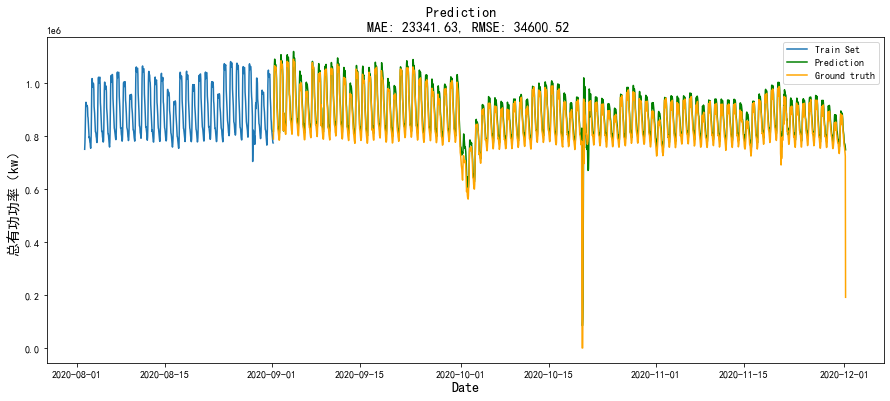

In [214]:
# 准备画图 - 训练数据
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_predict[:,0].size)['ds']

# 准备画图 - 测试数据
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks[-30*24:],y=y_train[-30*24:],ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite
#sns.lineplot(x=x_train_ticks, y=train_predict[:,0], ax=ax, color='red', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='总有功功率（kw）', fontsize=14)
plt.show()

- 对一天求和，并且求出其最大最小值

In [215]:
day_min = []
day_min_index = pd.date_range(start='2021-09-01',end='2021-11-30',freq='D')
day_min_index = pd.DataFrame(day_min_index,columns=['date_day'])
day_max = []
day_max_index = pd.date_range(start='2021-09-01',end='2021-11-30',freq='D')
day_max_index = pd.DataFrame(day_max_index,columns=['date_day'])

for i in range(91):
#     print(test_predict[i*24:(i+1)*24-1,:].sum())
    day_max.append(test_predict[i*24:(i+1)*24-1,:].max())
    day_min.append(test_predict[i*24:(i+1)*24-1,:].min())
# sum_max = day_sum.find(day_sum.max())
day_min = pd.DataFrame(day_min,columns=['max'])
day_min = pd.concat((day_min,day_min_index),axis=1)
day_min.index = day_min['date_day']

day_max = pd.DataFrame(day_max,columns=['min'])
day_max = pd.concat((day_max,day_max_index),axis=1)
day_max.index = day_max['date_day']

In [217]:
day_max.to_csv("数据预测90天max.csv",index=False,encoding='utf_8_sig')
day_min.to_csv("数据预测90天min.csv",index=False,encoding='utf_8_sig')

In [395]:
for i in range(day_sum['sum'].count()):
    if (day_sum.iloc[i,0] == day_sum['sum'].max()):
        print("\n最大值为：",day_sum.iloc[i,0])
        print("最大日期为：",day_sum.iloc[i,1])
    if (day_sum.iloc[i,0] == day_sum['sum'].min()):
        print("\n最小值为：",day_sum.iloc[i,0])
        print("最小日期为：",day_sum.iloc[i,1])
print(f'\nPrediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}')


最小值为： 543224300.0
最小日期为： 2021-06-14 00:00:00

最大值为： 672888960.0
最大日期为： 2021-07-14 00:00:00

Prediction 
 MAE: 15462.49, RMSE: 27229.22
